# sklearn

## Зарплатка

### Импорт библиотек

In [106]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, normalize, Normalizer, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV




import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro

# Обязательная ячейка

In [ ]:
path_to_all_data = r'C:\Users\user\Desktop\learn models'

In [6]:
file = r'sklearn\Salary Prediction of Data Professions.csv'

df = pd.read_csv(os.path.join(path_to_all_data, file))
path_to_all_data

'C:\\Users\\user\\Desktop\\learn models'

### Разглядывание датасета

In [7]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [8]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [9]:
for i in df:
    print(f'{i.rjust(20)}: {str(df[i].nunique()).rjust(5)}')# - {df[i].unique()}')

          FIRST NAME:  2367
           LAST NAME:  2475
                 SEX:     2
                 DOJ:   967
        CURRENT DATE:     1
         DESIGNATION:     6
                 AGE:    25
              SALARY:  2305
                UNIT:     6
         LEAVES USED:    16
    LEAVES REMAINING:    16
             RATINGS:     4
            PAST EXP:    21


In [10]:
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

### Обработка данных

In [11]:
df['AGE'].mean()

24.756449165402124

In [12]:
df['AGE'].replace(np.NaN , int(df['AGE'].mean()), inplace=True) # замена нанов на среднее

In [13]:
df['LAST NAME'].replace(np.NaN , '', inplace=True) # убираю отдельные строки с именем и фамилией

In [14]:
df['NAME'] = df['LAST NAME'] + ' ' + df['FIRST NAME'] # криво но работает
df.insert(0, 'NAME', df.pop('NAME'))
df.drop(['LAST NAME', 'FIRST NAME'], axis=1, inplace=True)

In [15]:
df.iloc[0:2]

,NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,ARMEN TOMASA,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,F,NaN,01-07-2016,Associate,24.0,89207,Web,NaN,13.0,NaN,7


In [16]:
df.drop(['CURRENT DATE', 'DOJ'], axis=1, inplace=True) # нужны для... ну его лесом

In [17]:
df.dropna(inplace=True)

In [18]:
df.duplicated().sum()

161

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,24.724110,58044.713997,22.492314,7.507686,3.481796,1.555421
std,3.907668,36763.857833,4.597514,4.597514,1.115213,2.702758
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43396.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,50285.250000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [21]:
df.head(5)

,NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,ARMEN TOMASA,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,ANCY OLIVE,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,AQUILAR CHERRY,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
5,VICTORIA,F,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
6,AGULAR ELLIOT,M,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0


In [22]:
df['DESIGNATION'].value_counts() # далее смотрю на баланс классов - всё очень плохо

DESIGNATION
Analyst           1850
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      60
Director            27
Name: count, dtype: int64

In [23]:
df.dtypes

NAME                 object
SEX                  object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [24]:
df.head(1)

,NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,ARMEN TOMASA,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0


In [25]:
for i in df:
    print(f'{i.rjust(20)}: {str(df[i].nunique()).rjust(5)}')# - {df[i].unique()}')

                NAME:  2472
                 SEX:     2
         DESIGNATION:     6
                 AGE:    25
              SALARY:  2300
                UNIT:     6
         LEAVES USED:    16
    LEAVES REMAINING:    16
             RATINGS:     4
            PAST EXP:    21


In [26]:
df = df.astype({'AGE': 'int', 'DESIGNATION' : 'category'})

In [27]:
df.SEX = pd.Categorical(df.SEX).codes

In [28]:
for name in ('PAST EXP', 'RATINGS'): #values_counts() но я хочу показать что знаю groupby
    print(df.groupby(name).count().iloc[:, 0])

PAST EXP
0     1226
1      460
2      340
3      152
4       51
5       51
6       46
7       25
8       27
9       16
10      20
11      17
12      10
13      10
14       4
15       5
16       3
17       5
18       2
19       1
23       1
Name: NAME, dtype: int64
RATINGS
2.0    630
3.0    619
4.0    625
5.0    598
Name: NAME, dtype: int64


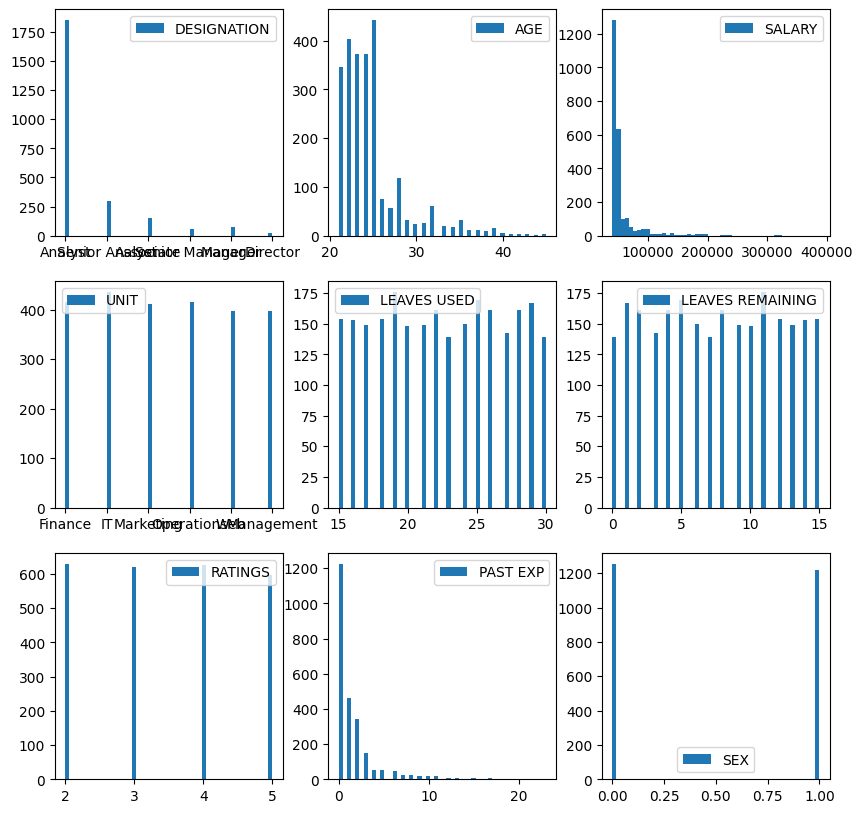

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
names = ('DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'SEX')

for i in range(9):
    
    axes[i // 3, i % 3].hist(df[names[i]], bins=50)
    axes[i // 3, i % 3].legend((names[i], ))
    

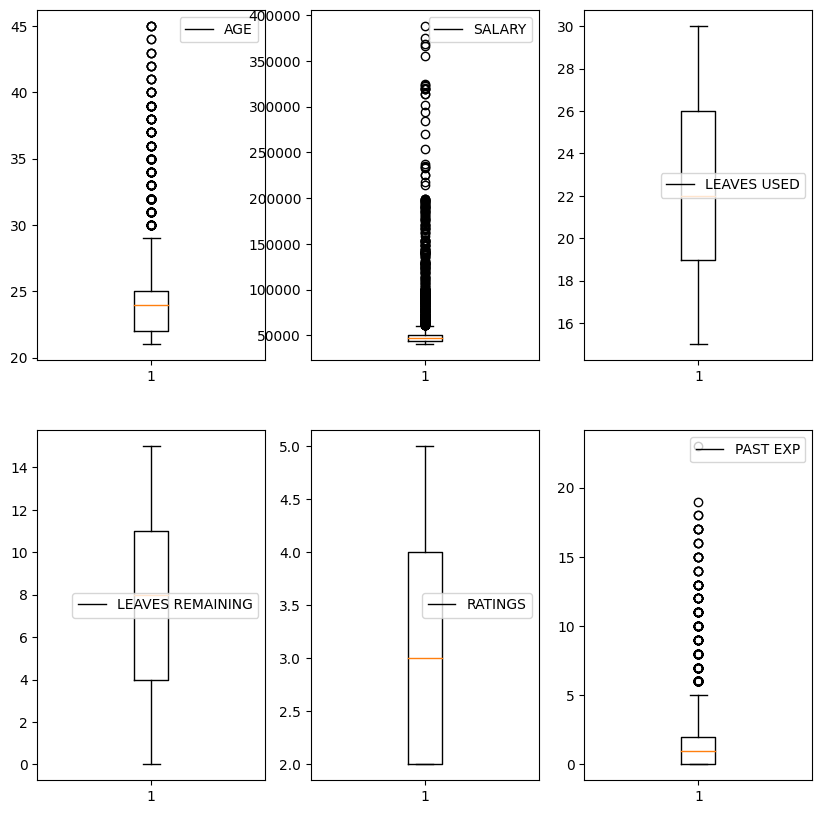

In [30]:
# for col in data.columns:
#     plt.figure(figsize=(8, 6))
#     plt.boxplot(data[col])
#     plt.title(f'{col}')
#     plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 10))
names = ('AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', )

for i in range(6):
    
    axes[i // 3, i % 3].boxplot(df[names[i]])
    axes[i // 3, i % 3].legend((names[i], ))

### baseline

In [31]:
df.columns

Index(['NAME', 'SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'LEAVES USED',
       'LEAVES REMAINING', 'RATINGS', 'PAST EXP'],
      dtype='object')

In [39]:
data = df.drop(['NAME', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP'], axis=1)

In [40]:
data

,SEX,DESIGNATION,AGE,SALARY,UNIT
0,0,Analyst,21,44570,Finance
2,0,Analyst,21,40955,Finance
3,0,Analyst,22,45550,IT
5,0,Analyst,22,48736,Marketing
6,1,Analyst,22,40339,Marketing
...,...,...,...,...,...
2634,0,Senior Manager,36,185977,Management
2635,0,Analyst,23,45758,IT
2636,0,Analyst,21,47315,Web
2637,0,Analyst,24,45172,Web


In [41]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['SALARY'], axis=1), data['SALARY'], test_size=0.3, random_state=42) # цену от всего

In [42]:
median = np.full((len(y_test), 1), np.median(y_train))
mean = np.full((len(y_test), 1), np.mean(y_train)) 

In [43]:
print(f'MSE for median: {mean_squared_error(y_test, median):.4f}')
print(f'MAE for median: {mean_absolute_error(y_test, median):.4f}')
print()
print(f'MSE for mean: {mean_squared_error(y_test, mean):.4f}')
print(f'MAE for mean: {mean_absolute_error(y_test, mean):.4f}')
mse_med, mae_med = mean_squared_error(y_test, median), mean_absolute_error(y_test, median)
mse_mea, mae_mea = mean_squared_error(y_test, mean), mean_absolute_error(y_test, mean)

MSE for median: 1066149560.6617
MAE for median: 13600.7588

MSE for mean: 959553858.2146
MAE for mean: 18704.1347


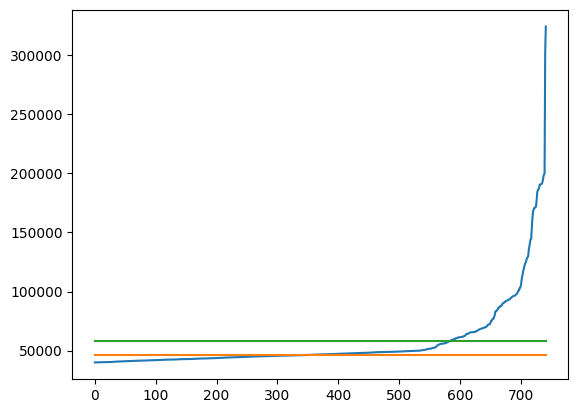

In [44]:
plt.plot(np.sort(np.array(y_test)).reshape(-1))
plt.plot(median.reshape(-1))
plt.plot(mean.reshape(-1))

### LinearRegression

In [45]:
ord_enc = OrdinalEncoder()

In [46]:
enc_sample = data.loc[:, ['UNIT', 'DESIGNATION']]
ord_enc.fit(enc_sample)
data.loc[:, ['UNIT', 'DESIGNATION']] = ord_enc.transform(data.loc[:, ['UNIT', 'DESIGNATION']])

In [47]:
data.head(3)

,SEX,DESIGNATION,AGE,SALARY,UNIT
0,0,0.0,21,44570,0.0
2,0,0.0,21,40955,0.0
3,0,0.0,22,45550,1.0


In [48]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['SALARY'], axis=1), data['SALARY'], test_size=0.3, random_state=42) # цену от всего

In [49]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
print(data.columns)
print(linear_model.coef_) # массив весов
print(linear_model.intercept_) # значение смещения

Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT'], dtype='object')
[-2043.5068034  -2127.65313574  9016.40879554   -22.98136829]
-161759.06615273823


In [50]:
y_pred = linear_model.predict(x_test)

In [51]:
print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_lin, mae_lin = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_mea - mse_lin, mae_med - mae_lin

MSE for linear model: 270364611.3437
MAE for linear model: 13070.8540


(689189246.8708992, 529.904778893726)

In [52]:
norma = Normalizer()
norma.fit(x_train)
x_ntrain = norma.transform(x_train)
x_ntest = norma.transform(x_test)

In [53]:
linear_model = LinearRegression()
linear_model.fit(x_ntrain, y_train)
print(data.columns)
print(linear_model.coef_) # массив весов
print(linear_model.intercept_) # значение смещения

y_pred = linear_model.predict(x_ntest)

print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_nlin, mae_nlin = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_lin - mse_nlin, mae_lin - mae_nlin

Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT'], dtype='object')
[ -86527.60639465  538446.23532537 3571941.74726038  323127.90519656]
-3523108.959207338
MSE for linear model: 717593420.6722
MAE for linear model: 17350.7089


(-447228809.3284782, -4279.854905595112)

In [54]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [55]:
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
print(data.columns)
print(linear_model.coef_) # массив весов
print(linear_model.intercept_) # значение смещения

y_pred = linear_model.predict(x_test_poly)

print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_plin, mae_plin = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_lin - mse_plin, mae_lin - mae_plin

Index(['SEX', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT'], dtype='object')
[     0.          14029.81900929   3034.63647049 -23261.10288308
   6399.8049537   14029.81900929   1801.74763785  -1289.76708115
    635.89938909  -3204.97544804    416.68063746    146.12459187
    538.43011239   -240.46912335   -210.59198369]
294059.36378053966
MSE for linear model: 94275856.2977
MAE for linear model: 5521.7438


(176088755.04604012, 7549.110208958885)

In [56]:
y_test = np.array(y_test)
for i in range(3):
    print(f'Предсказание: {y_pred[i]:.1f}, суровая реальность: {y_test[i]:.1f}, дельта: {(y_pred[i] - y_test[i]):.1f}')


Предсказание: 45054.2, суровая реальность: 49826.0, дельта: -4771.8
Предсказание: 123441.3, суровая реальность: 128247.0, дельта: -4805.7
Предсказание: 51577.6, суровая реальность: 56028.0, дельта: -4450.4


In [57]:
delta = y_test - y_pred

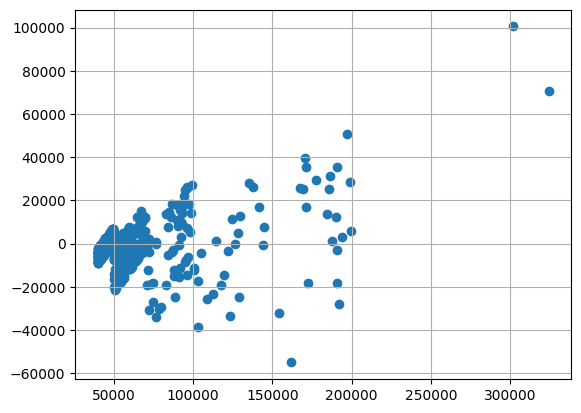

In [58]:
plt.scatter(y_test, delta) # как и видим - из-за кривой выборки чем ближе к краю выборки, тем хуже
plt.grid() # а вообще...

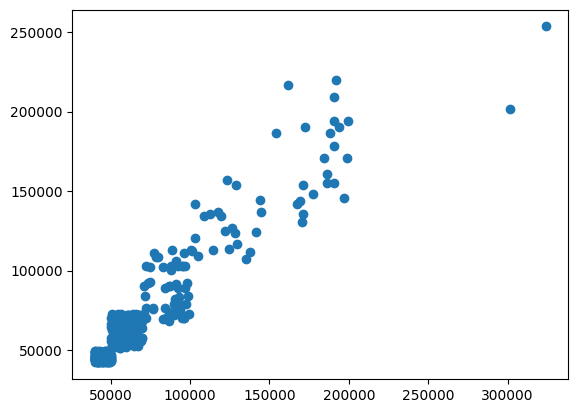

In [59]:
plt.scatter(y_test, y_pred)

### DecisionTreeRegressor

In [60]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [61]:
y_pred = tree.predict(x_test)

print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_tre, mae_tre = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_lin - mse_tre, mae_lin - mae_tre

MSE for linear model: 66865513.7016
MAE for linear model: 4581.3538


(203499097.64215916, 8489.500203853415)

Предсказание: 45204.0, суровая реальность: 49826.0, дельта: -4622.0
Предсказание: 112920.5, суровая реальность: 128247.0, дельта: -15326.5
Предсказание: 58110.9, суровая реальность: 56028.0, дельта: 2082.9


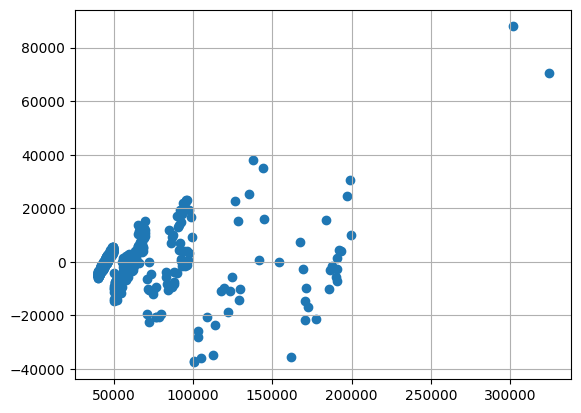

In [62]:
y_test = np.array(y_test)
for i in range(3):
    print(f'Предсказание: {y_pred[i]:.1f}, суровая реальность: {y_test[i]:.1f}, дельта: {(y_pred[i] - y_test[i]):.1f}')
delta = y_test - y_pred
plt.scatter(y_test, delta) # как и видим - из-за кривой выборки чем ближе к краю выборки, тем хуже
plt.grid()

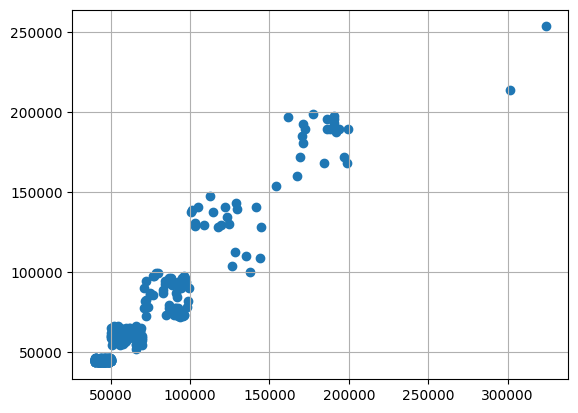

In [63]:
plt.scatter(y_test, y_pred)
plt.grid()

### RandomForest

In [64]:
random_forest = RandomForestRegressor(n_estimators=200)
random_forest.fit(x_train, np.array(y_train).reshape(-1))

RandomForestRegressor(n_estimators=200)

In [65]:
y_pred = random_forest.predict(x_test)

print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_rtre, mae_rtre = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_lin - mse_rtre, mae_lin - mae_rtre # да, по факту база - линейка

MSE for linear model: 45772325.6894
MAE for linear model: 4296.8680


(224592285.65426898, 8773.985967993322)

Предсказание: 45160.1, суровая реальность: 49826.0, дельта: -4665.9
Предсказание: 116108.3, суровая реальность: 128247.0, дельта: -12138.7
Предсказание: 58160.0, суровая реальность: 56028.0, дельта: 2132.0


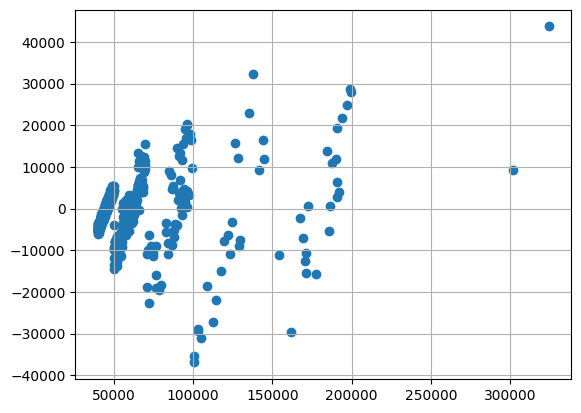

In [66]:
# Предсказание: 45249.0, суровая реальность: 49826.0, дельта: -4577.0
# Предсказание: 115341.7, суровая реальность: 128247.0, дельта: -12905.3
# Предсказание: 58079.9, суровая реальность: 56028.0, дельта: 2051.9

y_test = np.array(y_test)
for i in range(3):
    print(f'Предсказание: {y_pred[i]:.1f}, суровая реальность: {y_test[i]:.1f}, дельта: {(y_pred[i] - y_test[i]):.1f}')
delta = y_test - y_pred
plt.scatter(y_test, delta) # как и видим - из-за кривой выборки чем ближе к краю выборки, тем хуже
plt.grid()

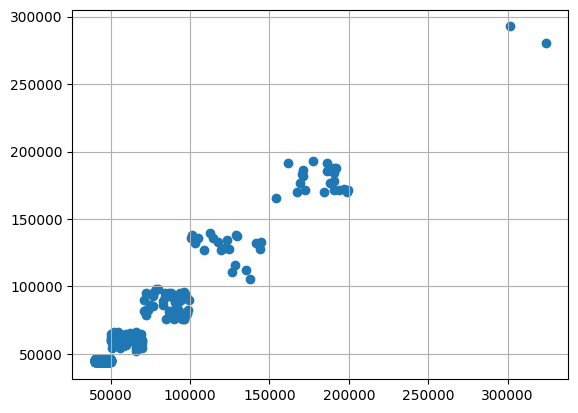

In [67]:
plt.scatter(y_test, y_pred)
plt.grid()

### Опорные вектора

In [68]:
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)

SVR()

In [69]:
y_pred = random_forest.predict(x_test)

print(f'MSE for linear model: {mean_squared_error(y_test, y_pred):.4f}')
print(f'MAE for linear model: {mean_absolute_error(y_test, y_pred):.4f}')
mse_svr, mae_svr = mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)
mse_lin - mse_svr, mae_lin - mae_svr # да, по факту база - линейка

MSE for linear model: 45772325.6894
MAE for linear model: 4296.8680


(224592285.65426898, 8773.985967993322)

Предсказание: 45160.1, суровая реальность: 49826.0, дельта: -4665.9
Предсказание: 116108.3, суровая реальность: 128247.0, дельта: -12138.7
Предсказание: 58160.0, суровая реальность: 56028.0, дельта: 2132.0


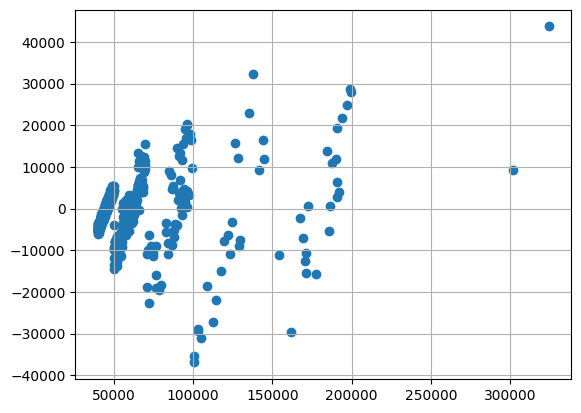

In [70]:
y_test = np.array(y_test)
for i in range(3):
    print(f'Предсказание: {y_pred[i]:.1f}, суровая реальность: {y_test[i]:.1f}, дельта: {(y_pred[i] - y_test[i]):.1f}')
delta = y_test - y_pred
plt.scatter(y_test, delta) # как и видим - из-за кривой выборки чем ближе к краю выборки, тем хуже
plt.grid()

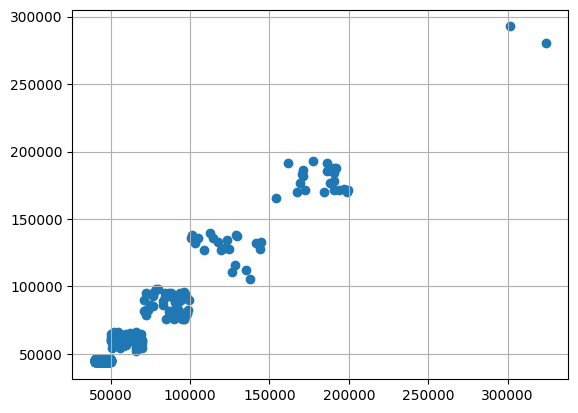

In [71]:
plt.scatter(y_test, y_pred)
plt.grid()

In [72]:
cv_results = cross_validate(random_forest, x_test, y_test, cv=30)

print(cv_results['test_score'])

[0.96841748 0.96949465 0.91836104 0.92175226 0.96723784 0.97666308
 0.94886678 0.92471919 0.73441324 0.84659299 0.89369875 0.83197464
 0.95106796 0.96585092 0.98833583 0.97897944 0.9509285  0.96323056
 0.9225405  0.96395792 0.95093236 0.96922854 0.78232038 0.98070846
 0.75828318 0.96627591 0.94781492 0.91377496 0.91674668 0.84474217]


In [73]:
max(cv_results['test_score']), min(cv_results['test_score'])

(0.9883358346671264, 0.734413237680177)

### Определение лучших параметров

In [74]:
param_grid = {'criterion': ['squared_error', 'absolute_error'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid)
grid_search.fit(x_train, y_train)
param = grid_search.best_params_
best_score = grid_search.best_score_
print(param)
print(best_score)

{'criterion': 'squared_error', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
0.949543286827715


In [76]:
param_grid = {'criterion': ['squared_error', 'absolute_error'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid)
grid_search.fit(x_train, y_train)
param = grid_search.best_params_
best_score = grid_search.best_score_
print(param)
print(best_score)

{'criterion': 'squared_error', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10}
0.9453502670122205


In [78]:
param_grid = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
             'degree': [2,3,4]}

grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid)
grid_search.fit(x_train, y_train)
param = grid_search.best_params_
best_score = grid_search.best_score_
print(param)
print(best_score)

{'C': 2.0, 'degree': 2, 'kernel': 'linear', 'tol': 1e-05}
0.34010412835308845


In [82]:
results_linear_regression = []

for i in range(30):
   
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    linear = LinearRegression()

    scores = cross_val_score(linear, x_train, y_train, cv=kfold, scoring='r2')
    mse_scores = cross_val_score(linear, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(linear, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    mean_score = scores.mean()
    results_linear_regression.append(mean_score)

In [85]:
results_decision_tree = []

for i in range(30):
   
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree=DecisionTreeRegressor(criterion= 'squared_error', splitter='random', min_samples_split=10, min_samples_leaf=5)

    scores = cross_val_score(tree, x_train, y_train, cv=kfold, scoring='r2')
    mse_scores = cross_val_score(tree, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(tree, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    mean_score = scores.mean()
    results_decision_tree.append(mean_score)

In [86]:
results_random_forest = []

for i in range(30):
   
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    random_forest=RandomForestRegressor(criterion='squared_error',  min_samples_leaf=10, min_samples_split=2, n_estimators=10)

    scores = cross_val_score(random_forest, x_train, y_train, cv=kfold, scoring='r2')
    mse_scores = cross_val_score(random_forest, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(random_forest, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    mean_score = scores.mean()
    results_random_forest.append(mean_score)

In [84]:
results_svm_poly = []

for i in range(30):

    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    svm = SVR(kernel='poly', C=2.0, degree=3, tol=0.0001)

    scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='r2')
    mse_scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    mean_score = scores.mean()
    results_svm_poly.append(mean_score)

In [83]:
results_svm = []

for i in range(30):

    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    svm = SVR(kernel='linear', C=2.0, degree=2, tol=1e-05)

    scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='r2')
    mse_scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = cross_val_score(svm, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

    mean_score = scores.mean()
    results_svm.append(mean_score)

In [87]:
results = pd.DataFrame({
    'Decison Tree': results_decision_tree,
    'Random forest': results_random_forest,
    'Linear Regression': results_linear_regression,
    'Poly': results_svm_poly,
    'SVM': results_svm
})
results

,Decison Tree,Random forest,Linear Regression,Poly,SVM
0,0.941823,0.946013,0.771728,-0.002960,0.366266
1,0.947314,0.944977,0.750770,-0.003713,0.368646
2,0.946913,0.950115,0.758550,-0.002850,0.360742
3,0.949628,0.947695,0.758425,-0.000539,0.370150
4,0.950988,0.944298,0.759304,-0.002635,0.368370
5,0.938952,0.934661,0.718153,-0.003750,0.375558
6,0.948463,0.948158,0.734949,-0.003597,0.385293
7,0.944398,0.935331,0.763742,0.000156,0.377038
8,0.939479,0.944153,0.717064,-0.000153,0.386346
9,0.929625,0.937947,0.762048,-0.000902,0.361674


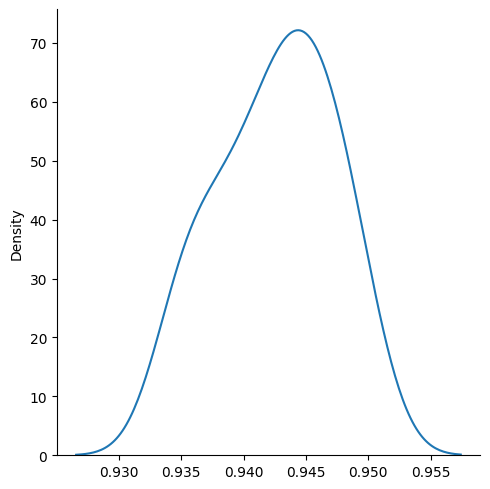

In [101]:
sns.displot(results_random_forest, kind = 'kde');

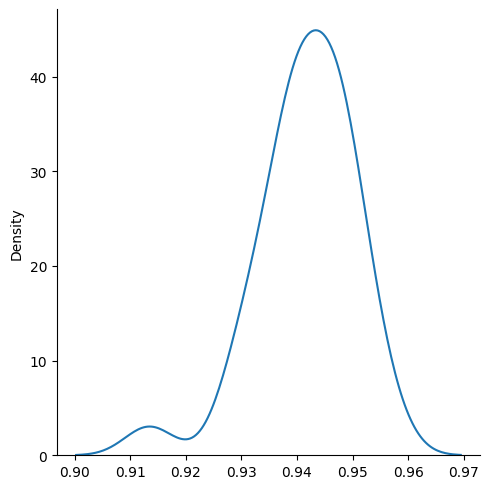

In [102]:
sns.displot(results_decision_tree, kind = 'kde');

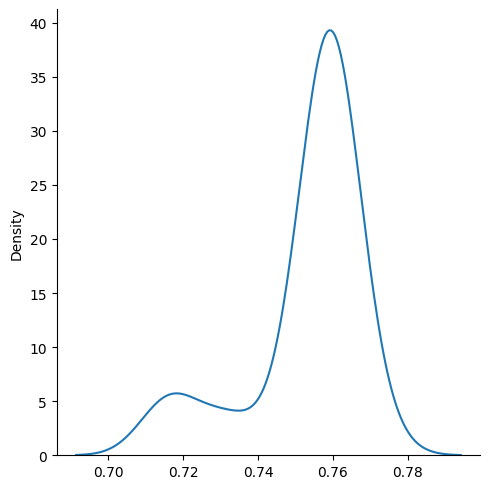

In [103]:
sns.displot(results_linear_regression, kind = 'kde');

### Провер чего? Правильно, очка

Функция f_oneway в библиотеке scipy.stats выполняет одномерный дисперсионный анализ (One-Way ANOVA). Она проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение в популяции.

In [107]:
_, p = f_oneway(results_decision_tree, results_random_forest, results_linear_regression, results_svm_poly, results_svm)
alpha = 0.05
if p <= alpha:
    print('Null hypothesis rejected. Data is different')
else:
    print('Alternative hypothesis rejected. Results are equal')
print(p)

Null hypothesis rejected. Data is different
2.0006507458557145e-236


Проверка соответствия выборки нормальному распределению

In [109]:
shapiro(results_decision_tree), shapiro(results_random_forest), shapiro(results_linear_regression), shapiro(results_svm_poly), shapiro(results_svm)


(ShapiroResult(statistic=0.9368798136711121, pvalue=0.0749763622879982),
 ShapiroResult(statistic=0.9649682641029358, pvalue=0.4120566248893738),
 ShapiroResult(statistic=0.7122718095779419, pvalue=2.365553882555105e-06),
 ShapiroResult(statistic=0.9699661731719971, pvalue=0.5382503867149353),
 ShapiroResult(statistic=0.9575759172439575, pvalue=0.2682398855686188))

In [112]:
import collections

a = collections.defaultdict(list)
a['fd']

[]

In [116]:
a = [1, 2, 3]
for i, b in enumerate(a):
    print(i, b)

0 1
1 2
2 3
